## EDA on Terrorism Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data

In [2]:
df=pd.read_csv(r"C:\Users\Tejasvi\Downloads\terrorismData.csv")

In [3]:
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary


In [4]:
df.shape

(181691, 17)

### Checking null values

In [5]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           636
Summary        66129
Group              0
Target_type        0
Weapon_type        0
dtype: int64

### Dropping the columns contains large null values

In [6]:
df1=df.drop(['Latitude','Longitude','Killed','Wounded','Summary'],axis=1)

In [ ]:
## Drop null values

In [7]:
df1=df1.dropna()

In [8]:
df1.head()

,Year,Month,Day,Country,State,Region,City,AttackType,Target,Group,Target_type,Weapon_type
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,Armed Assault,Cairo Police Headquarters,Black Nationalists,Police,Firearms


In [9]:
df1.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
City           0
AttackType     0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [10]:
df1.shape

(180207, 12)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180207 entries, 1 to 181690
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         180207 non-null  int64 
 1   Month        180207 non-null  int64 
 2   Day          180207 non-null  int64 
 3   Country      180207 non-null  object
 4   State        180207 non-null  object
 5   Region       180207 non-null  object
 6   City         180207 non-null  object
 7   AttackType   180207 non-null  object
 8   Target       180207 non-null  object
 9   Group        180207 non-null  object
 10  Target_type  180207 non-null  object
 11  Weapon_type  180207 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.9+ MB


In [12]:
df1.describe()

,Year,Month,Day
count,180207.000000,180207.000000,180207.000000
mean,2002.696804,6.470598,15.507133
std,13.253717,3.387741,8.814350
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


### Top 10 Countries with Highest Terrorist attacks

In [13]:
values=df1.Country.value_counts()[:10]
values

Iraq              24578
Pakistan          14337
Afghanistan       12578
India             11918
Colombia           8289
Philippines        6901
Peru               6060
El Salvador        5264
United Kingdom     5219
Turkey             4283
Name: Country, dtype: int64

In [14]:
country=df1.Country.value_counts()[:10].index
country

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')

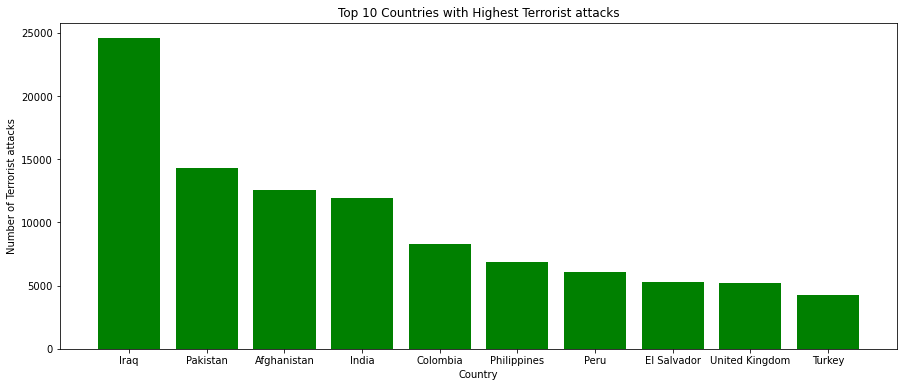

In [15]:
plt.figure(figsize=(15,6))
plt.bar(country,values,color='green')
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 10 Countries with Highest Terrorist attacks')
plt.show()

### Region wise terrorist attacks

In [18]:
value=df1.Region.value_counts()
value

Middle East & North Africa     50249
South Asia                     44710
South America                  18910
Sub-Saharan Africa             17519
Western Europe                 16511
Southeast Asia                 12152
Central America & Caribbean    10157
Eastern Europe                  5050
North America                   3382
East Asia                        764
Central Asia                     544
Australasia & Oceania            259
Name: Region, dtype: int64

In [19]:
Region=df1.Region.value_counts().index
Region

Index(['Middle East & North Africa', 'South Asia', 'South America',
       'Sub-Saharan Africa', 'Western Europe', 'Southeast Asia',
       'Central America & Caribbean', 'Eastern Europe', 'North America',
       'East Asia', 'Central Asia', 'Australasia & Oceania'],
      dtype='object')

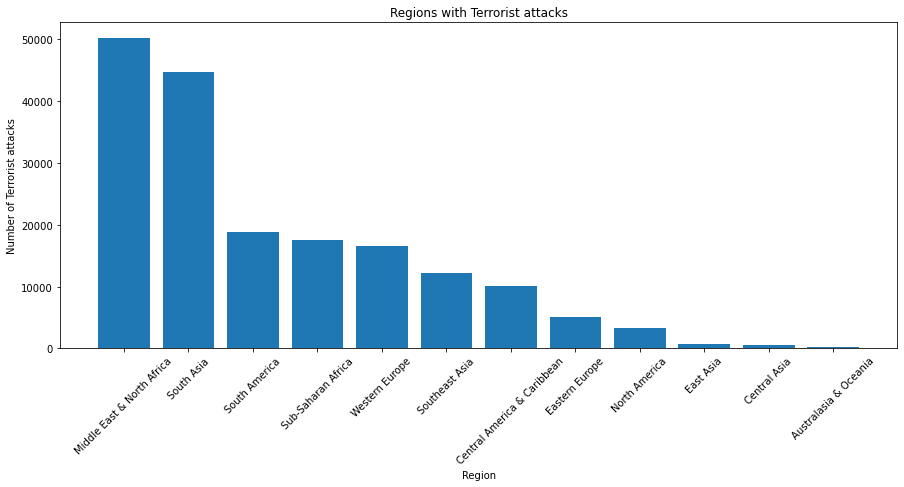

In [30]:
plt.figure(figsize=(15,6))
plt.bar(Region,value)
plt.xlabel('Region')
plt.ylabel('Number of Terrorist attacks')
plt.title('Regions with Terrorist attacks')
plt.xticks(rotation=45)
plt.show()

### Most types of Terrorist attacks 

In [23]:
Number=df1.AttackType.value_counts()
Number

Bombing/Explosion                      87648
Armed Assault                          42239
Assassination                          19164
Hostage Taking (Kidnapping)            11094
Facility/Infrastructure Attack         10278
Unknown                                 7218
Unarmed Assault                          998
Hostage Taking (Barricade Incident)      972
Hijacking                                596
Name: AttackType, dtype: int64

In [26]:
AttackType=df1.AttackType.value_counts().index
AttackType

Index(['Bombing/Explosion', 'Armed Assault', 'Assassination',
       'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack',
       'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)',
       'Hijacking'],
      dtype='object')

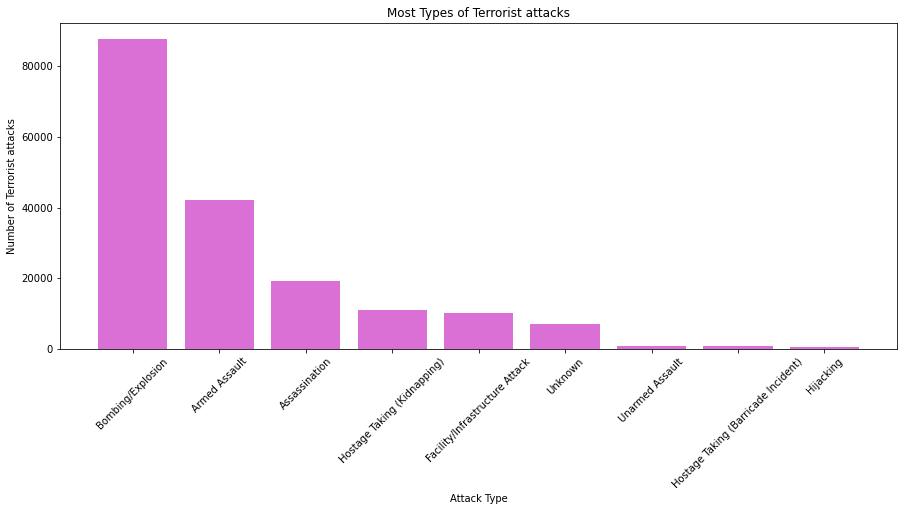

In [31]:
plt.figure(figsize=(15,6))
plt.bar(AttackType,Number,color='orchid')
plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most Types of Terrorist attacks')
plt.xticks(rotation=45)
plt.show()

### Most targeted places 

In [46]:
count=df1.Target.value_counts()[:30]
count

Civilians                  6441
Unknown                    5881
Soldiers                   3156
Patrol                     2941
Checkpoint                 2905
Vehicle                    2782
Officers                   1787
Village                    1678
Military Unit              1517
Bus                        1330
Convoy                     1262
Market                     1193
Police Station             1189
Unit                       1179
Base                        885
Office                      874
House                       824
Checkpost                   788
Post                        739
Mosque                      692
Bank                        676
Headquarters                668
Officer                     632
Members                     605
Civilian                    605
Town                        580
High tension line tower     538
Soldier                     526
unit                        517
School                      504
Name: Target, dtype: int64

In [47]:
Target=df1.Target.value_counts()[:30].index
Target

Index(['Civilians', 'Unknown', 'Soldiers', 'Patrol', 'Checkpoint', 'Vehicle',
       'Officers', 'Village', 'Military Unit', 'Bus', 'Convoy', 'Market',
       'Police Station', 'Unit', 'Base', 'Office', 'House', 'Checkpost',
       'Post', 'Mosque', 'Bank', 'Headquarters', 'Officer', 'Members',
       'Civilian', 'Town', 'High tension line tower', 'Soldier', 'unit',
       'School'],
      dtype='object')

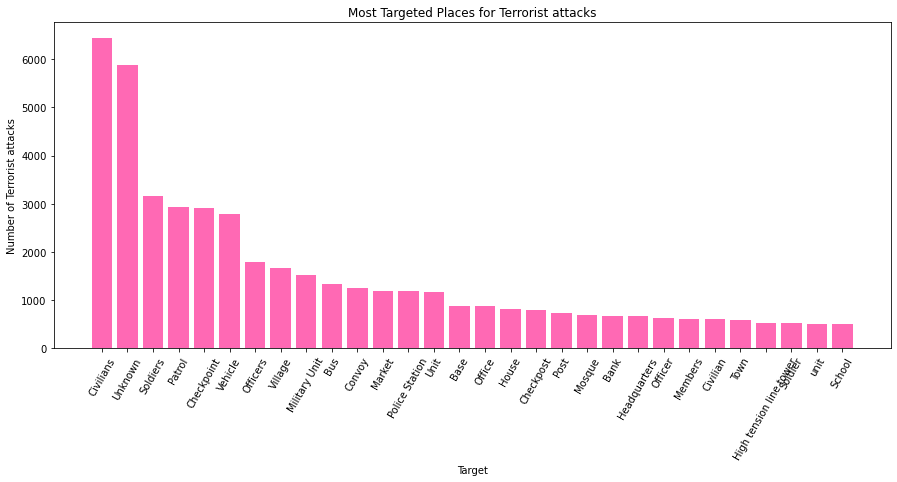

In [62]:
plt.figure(figsize=(15,6))
plt.bar(Target,count,color='hotpink')
plt.xlabel('Target')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most Targeted Places for Terrorist attacks')
plt.xticks(rotation=60)
plt.show()

### Groups of most targeted places

In [56]:
counts=df1.Target_type.value_counts()[:10]
counts

Private Citizens & Property       43133
Military                          27891
Police                            24393
Government (General)              21080
Business                          20472
Transportation                     6745
Utilities                          5991
Unknown                            5732
Religious Figures/Institutions     4412
Educational Institution            4286
Name: Target_type, dtype: int64

In [64]:
Targettype=df1.Target_type.value_counts()[:10].index

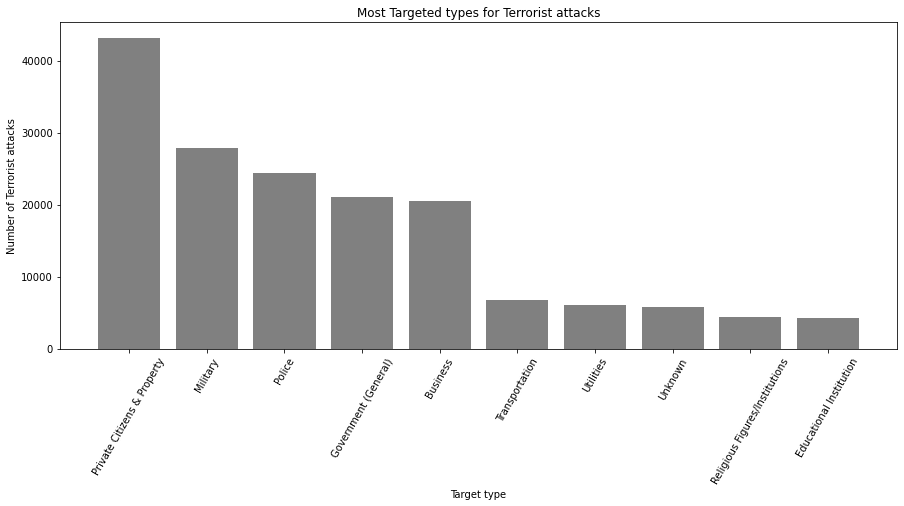

In [65]:
plt.figure(figsize=(15,6))
plt.bar(Targettype,counts,color='gray')
plt.xlabel('Target type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most Targeted types for Terrorist attacks')
plt.xticks(rotation=60)
plt.show()

### Most types of weapons used in Terrorist attacks

In [69]:
total=df1.Weapon_type.value_counts()[:10]
total

Explosives                                                                     91812
Firearms                                                                       57944
Unknown                                                                        14997
Incendiary                                                                     11061
Melee                                                                           3605
Chemical                                                                         320
Sabotage Equipment                                                               139
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      135
Other                                                                            114
Biological                                                                        35
Name: Weapon_type, dtype: int64

In [70]:
weapontype=df1.Weapon_type.value_counts()[:10].index

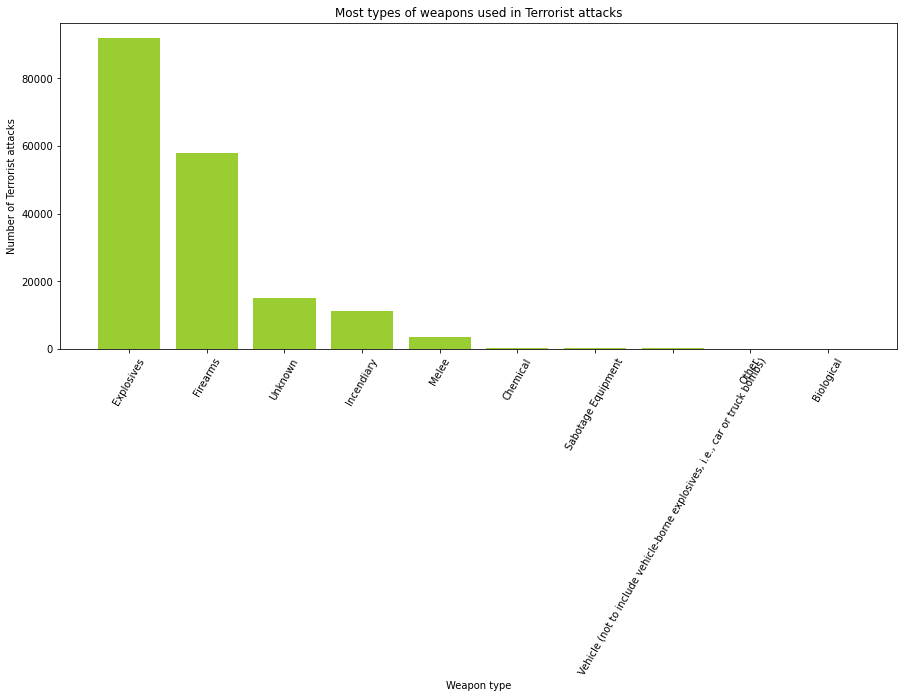

In [71]:
plt.figure(figsize=(15,6))
plt.bar(weapontype,total,color='yellowgreen')
plt.xlabel('Weapon type')
plt.ylabel('Number of Terrorist attacks')
plt.title('Most types of weapons used in Terrorist attacks')
plt.xticks(rotation=60)
plt.show()

### Yearly attacks

In [81]:
num_attacks=df1.groupby(['Year'])['Year'].count()
num_attacks

Year
1970      627
1971      466
1972      562
1973      457
1974      576
1975      737
1976      916
1977     1315
1978     1506
1979     2640
1980     2604
1981     2543
1982     2500
1983     2828
1984     3450
1985     2832
1986     2819
1987     3157
1988     3706
1989     4305
1990     3864
1991     4651
1992     5010
1994     3401
1995     3028
1996     3025
1997     3111
1998      930
1999     1395
2000     1812
2001     1904
2002     1330
2003     1277
2004     1161
2005     1998
2006     2695
2007     3195
2008     4635
2009     4557
2010     4761
2011     5010
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10898
Name: Year, dtype: int64

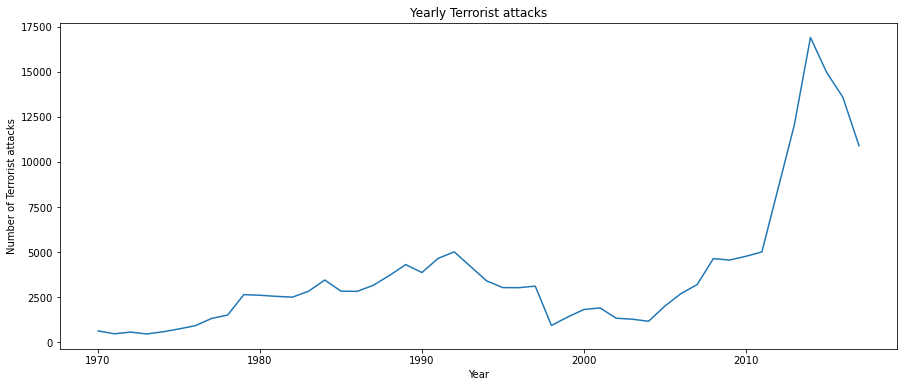

In [82]:
plt.figure(figsize=(15,6))
plt.plot(num_attacks.index,num_attacks.values)
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Yearly Terrorist attacks')
plt.show()

Here we can observe that after 2011 the number of terrorist attacks rapidly increases.

### Comparing before 2011 and after 2011

In [99]:
newdf=pd.DataFrame(data = {
     'year' : ['Before 2011','After 2011'],
     'value' : [df1[df1.Year < 2011].shape[0],df1[df1.Year >= 2011].shape[0]]})
newdf = newdf.set_index('year')
newdf

,value
year,
Before 2011,98286
After 2011,81921


<AxesSubplot:ylabel='value'>

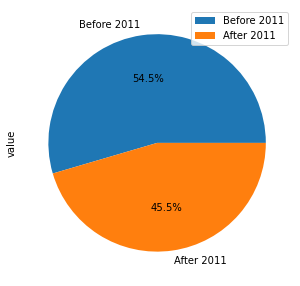

In [100]:
newdf.plot.pie(y='value',figsize=(5, 5),autopct='%1.1f%%')

The percentage of terrorist attacks in 40 years (1970-2010) is 54.5%, and in just 7 years( 2011-2017)is 45.5%.


In [102]:
before_2011 = df1[df1.Year <= 2011]
before_2011.head()

,Year,Month,Day,Country,State,Region,City,AttackType,Target,Group,Target_type,Weapon_type
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,Armed Assault,Cairo Police Headquarters,Black Nationalists,Police,Firearms


In [104]:
after_2011 = df1[df1.Year > 2011]
after_2011.head()

,Year,Month,Day,Country,State,Region,City,AttackType,Target,Group,Target_type,Weapon_type
104778,2012,1,1,Pakistan,Balochistan,South Asia,Quetta,Bombing/Explosion,Paan Shop,Unknown,Business,Explosives
104779,2012,1,1,Kenya,North Eastern,Sub-Saharan Africa,Garissa,Armed Assault,Bar,Al-Shabaab,Business,Explosives
104780,2012,1,1,Pakistan,Balochistan,South Asia,Sui,Bombing/Explosion,Soldiers,Baloch Republican Army (BRA),Military,Explosives
104781,2012,1,1,Kenya,North Eastern,Sub-Saharan Africa,Garissa,Armed Assault,Bar,Al-Shabaab,Business,Explosives
104782,2012,1,1,Pakistan,Balochistan,South Asia,Peer Chhatta,Hostage Taking (Kidnapping),Civilians,Unknown,Private Citizens & Property,Firearms


### Countrywise terrorist attcks before 2011

In [105]:
before_2011.Country.value_counts()[:10]


Iraq              7779
Colombia          7432
India             6878
Peru              6011
Pakistan          5491
El Salvador       5264
United Kingdom    4583
Philippines       3359
Spain             3204
Sri Lanka         2907
Name: Country, dtype: int64

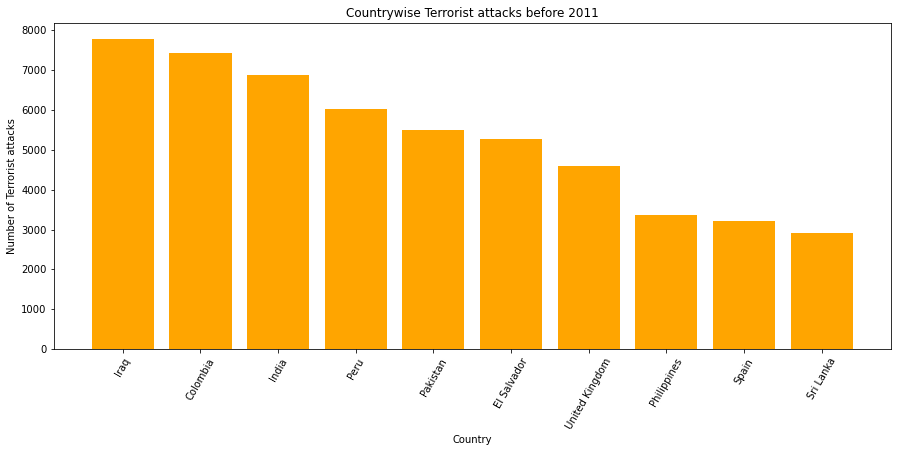

In [108]:
plt.figure(figsize=(15,6))
plt.bar(before_2011.Country.value_counts()[:10].index,before_2011.Country.value_counts()[:10],color='orange')
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Countrywise Terrorist attacks before 2011')
plt.xticks(rotation=60)
plt.show()

### Countrywise terrorist attcks after 2011

In [109]:
after_2011.Country.value_counts()[:10]

Iraq           16799
Afghanistan     9695
Pakistan        8846
India           5040
Philippines     3542
Nigeria         3331
Somalia         3173
Yemen           2915
Libya           2231
Syria           2003
Name: Country, dtype: int64

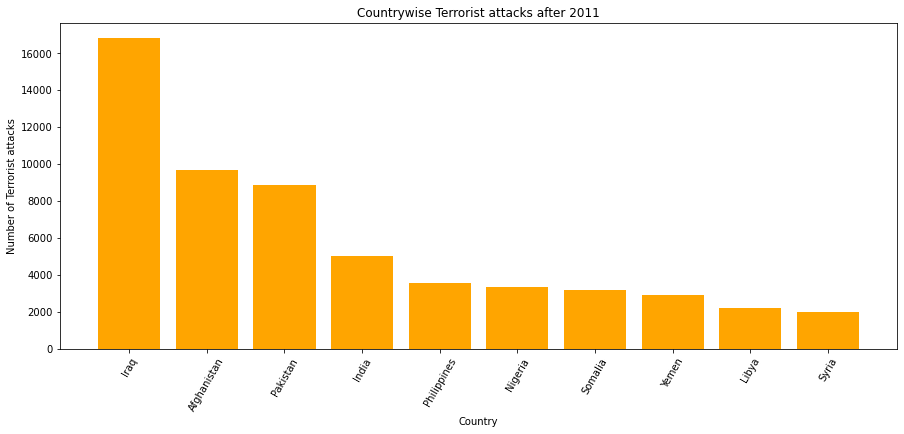

In [110]:
plt.figure(figsize=(15,6))
plt.bar(after_2011.Country.value_counts()[:10].index,after_2011.Country.value_counts()[:10],color='orange')
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Countrywise Terrorist attacks after 2011')
plt.xticks(rotation=60)
plt.show()

 Here we observe that most terrorist attack cases found in Iraq.